# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Remove this
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pp
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 611


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
# #     city_url = url + "&q=" + city + "appid=" + weather_api_key + "&units=metric"
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
#     # Log the url, record, and set numbers
     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#   Add 1 to the record count
    record_count += 1

    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()
        print(weather_json)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city = weather_json["name"]
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["weather"][0]["main"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]


        # Append the City information into city_data list
        city_dict = {"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}

        city_data.append(city_dict)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
{'coord': {'lon': -8.6151, 'lat': 41.5388}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7.93, 'feels_like': 6.01, 'temp_min': 7.6, 'temp_max': 9.91, 'pressure': 1013, 'humidity': 90, 'sea_level': 1013, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.03, 'deg': 338, 'gust': 4.73}, 'clouds': {'all': 100}, 'dt': 1704415837, 'sys': {'type': 2, 'id': 2021760, 'country': 'PT', 'sunrise': 1704441666, 'sunset': 1704475059}, 'timezone': 0, 'id': 2742416, 'name': 'Barcelos', 'cod': 200}
{'City': 'Barcelos',
 'Cloudiness': 'Clouds',
 'Country': 'PT',
 'Date': 1704415837,
 'Humidity': 90,
 'Lat': 41.5388,
 'Lng': -8.6151,
 'Max Temp': 9.91,
 'Wind Speed': 3.03}
{'coord': {'lon': -176.5597, 'lat': -43.9535}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.12

{'coord': {'lon': 135.6, 'lat': 62.6667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -41.56, 'feels_like': -41.56, 'temp_min': -41.56, 'temp_max': -41.56, 'pressure': 1025, 'humidity': 100, 'sea_level': 1025, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 0.83, 'deg': 127, 'gust': 0.9}, 'clouds': {'all': 49}, 'dt': 1704415839, 'sys': {'country': 'RU', 'sunrise': 1704414348, 'sunset': 1704433134}, 'timezone': 32400, 'id': 2022773, 'name': 'Khandyga', 'cod': 200}
{'City': 'Khandyga',
 'Cloudiness': 'Clouds',
 'Country': 'RU',
 'Date': 1704415839,
 'Humidity': 100,
 'Lat': 62.6667,
 'Lng': 135.6,
 'Max Temp': -41.56,
 'Wind Speed': 0.83}
{'coord': {'lon': -159.775, 'lat': -21.2078}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.03, 'feels_like': 31.87, 'temp_min': 28.03, 'temp_max': 28.03, 'pressure': 1012

{'coord': {'lon': 144.6691, 'lat': 13.2658}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 29.65, 'feels_like': 36.65, 'temp_min': 29.21, 'temp_max': 30.55, 'pressure': 1013, 'humidity': 85, 'sea_level': 1013, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.45, 'deg': 66, 'gust': 6.05}, 'clouds': {'all': 13}, 'dt': 1704415840, 'sys': {'type': 2, 'id': 2076599, 'country': 'GU', 'sunrise': 1704401100, 'sunset': 1704442027}, 'timezone': 36000, 'id': 4043399, 'name': 'Merizo Village', 'cod': 200}
{'City': 'Merizo Village',
 'Cloudiness': 'Clouds',
 'Country': 'GU',
 'Date': 1704415840,
 'Humidity': 85,
 'Lat': 13.2658,
 'Lng': 144.6691,
 'Max Temp': 30.55,
 'Wind Speed': 4.45}
{'coord': {'lon': 140.7, 'lat': -2.5333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 30.66, 'feels_like': 36.15, 'temp_min': 30.66, 'temp_max':

{'coord': {'lon': 19.2345, 'lat': -34.4187}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 19.19, 'feels_like': 19.41, 'temp_min': 19.19, 'temp_max': 19.19, 'pressure': 1010, 'humidity': 86, 'sea_level': 1010, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 3.3, 'deg': 76, 'gust': 4.05}, 'clouds': {'all': 0}, 'dt': 1704415841, 'sys': {'country': 'ZA', 'sunrise': 1704425810, 'sunset': 1704477544}, 'timezone': 7200, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}
{'City': 'Hermanus',
 'Cloudiness': 'Clear',
 'Country': 'ZA',
 'Date': 1704415841,
 'Humidity': 86,
 'Lat': -34.4187,
 'Lng': 19.2345,
 'Max Temp': 19.19,
 'Wind Speed': 3.3}
{'coord': {'lon': 96.8225, 'lat': -12.1568}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.99, 'feels_like': 31.77, 'temp_min': 27.99, 'temp_max': 27.99, 'pressure': 1011, 'humidity':

{'coord': {'lon': 55.6814, 'lat': 29.452}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 5.05, 'feels_like': 5.05, 'temp_min': 5.05, 'temp_max': 5.05, 'pressure': 1018, 'humidity': 42, 'sea_level': 1018, 'grnd_level': 825}, 'visibility': 10000, 'wind': {'speed': 0.88, 'deg': 74, 'gust': 0.91}, 'clouds': {'all': 0}, 'dt': 1704415842, 'sys': {'country': 'IR', 'sunrise': 1704424350, 'sunset': 1704461504}, 'timezone': 12600, 'id': 114259, 'name': 'Sīrjān', 'cod': 200}
{'City': 'Sīrjān',
 'Cloudiness': 'Clear',
 'Country': 'IR',
 'Date': 1704415842,
 'Humidity': 42,
 'Lat': 29.452,
 'Lng': 55.6814,
 'Max Temp': 5.05,
 'Wind Speed': 0.88}
{'coord': {'lon': -73.65, 'lat': -37.6167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14.98, 'feels_like': 14.91, 'temp_min': 14.98, 'temp_max': 14.98, 'pressure': 1018, 'humidity': 91, 'sea_lev

{'coord': {'lon': -1.1494, 'lat': 60.1545}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 5, 'feels_like': -1.38, 'temp_min': 5, 'temp_max': 5, 'pressure': 1001, 'humidity': 94, 'sea_level': 1001, 'grnd_level': 1001}, 'visibility': 9018, 'wind': {'speed': 14.25, 'deg': 153, 'gust': 16.83}, 'rain': {'1h': 0.21}, 'clouds': {'all': 100}, 'dt': 1704415842, 'sys': {'type': 1, 'id': 1438, 'country': 'GB', 'sunrise': 1704445567, 'sunset': 1704467574}, 'timezone': 0, 'id': 2644605, 'name': 'Lerwick', 'cod': 200}
{'City': 'Lerwick',
 'Cloudiness': 'Rain',
 'Country': 'GB',
 'Date': 1704415842,
 'Humidity': 94,
 'Lat': 60.1545,
 'Lng': -1.1494,
 'Max Temp': 5,
 'Wind Speed': 14.25}
{'coord': {'lon': 112.9333, 'lat': 2.0167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 25.09, 'feels_like': 26.14, 'temp_min': 25.09, 'temp_max': 25.09, 'pressure

{'coord': {'lon': -72.4875, 'lat': -51.7236}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.36, 'feels_like': 9.85, 'temp_min': 10.36, 'temp_max': 10.36, 'pressure': 1000, 'humidity': 92, 'sea_level': 1000, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 0.72, 'deg': 297, 'gust': 1.18}, 'clouds': {'all': 100}, 'dt': 1704415843, 'sys': {'country': 'CL', 'sunrise': 1704357547, 'sunset': 1704416994}, 'timezone': -10800, 'id': 3874958, 'name': 'Puerto Natales', 'cod': 200}
{'City': 'Puerto Natales',
 'Cloudiness': 'Clouds',
 'Country': 'CL',
 'Date': 1704415843,
 'Humidity': 92,
 'Lat': -51.7236,
 'Lng': -72.4875,
 'Max Temp': 10.36,
 'Wind Speed': 0.72}
{'coord': {'lon': 25.5701, 'lat': -33.918}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 18.05, 'feels_like': 18.39, 'temp_min': 17.95, 'temp_max': 21.72, 'pressur

{'coord': {'lon': 1.4078, 'lat': 18.4411}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 20.47, 'feels_like': 18.96, 'temp_min': 20.47, 'temp_max': 20.47, 'pressure': 1016, 'humidity': 15, 'sea_level': 1016, 'grnd_level': 963}, 'visibility': 10000, 'wind': {'speed': 3.57, 'deg': 94, 'gust': 3.63}, 'clouds': {'all': 18}, 'dt': 1704415844, 'sys': {'country': 'ML', 'sunrise': 1704436049, 'sunset': 1704475864}, 'timezone': 0, 'id': 2455290, 'name': 'Kidal', 'cod': 200}
{'City': 'Kidal',
 'Cloudiness': 'Clouds',
 'Country': 'ML',
 'Date': 1704415844,
 'Humidity': 15,
 'Lat': 18.4411,
 'Lng': 1.4078,
 'Max Temp': 20.47,
 'Wind Speed': 3.57}
{'coord': {'lon': -147.5333, 'lat': 64.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -13.07, 'feels_like': -20.07, 'temp_min': -15.35, 'temp_max': -13.07, 'pressure': 994, 'humidity': 66}, 'vi

{'coord': {'lon': 169.4708, 'lat': -46.5619}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 12.25, 'feels_like': 10.86, 'temp_min': 12.25, 'temp_max': 12.25, 'pressure': 1011, 'humidity': 51, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.96, 'deg': 244, 'gust': 6.35}, 'rain': {'1h': 0.31}, 'clouds': {'all': 100}, 'dt': 1704415845, 'sys': {'country': 'NZ', 'sunrise': 1704387357, 'sunset': 1704443861}, 'timezone': 46800, 'id': 2185172, 'name': 'Papatowai', 'cod': 200}
{'City': 'Papatowai',
 'Cloudiness': 'Rain',
 'Country': 'NZ',
 'Date': 1704415845,
 'Humidity': 51,
 'Lat': -46.5619,
 'Lng': 169.4708,
 'Max Temp': 12.25,
 'Wind Speed': 4.96}
{'coord': {'lon': 25.678, 'lat': 8.4596}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19.03, 'feels_like': 17.48, 'temp_min': 19.03, 'temp_max': 19.03, '

{'coord': {'lon': -23.2167, 'lat': 15.1333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.44, 'feels_like': 21.34, 'temp_min': 21.44, 'temp_max': 21.44, 'pressure': 1016, 'humidity': 65, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 5.18, 'deg': 33, 'gust': 5.56}, 'clouds': {'all': 0}, 'dt': 1704415846, 'sys': {'type': 1, 'id': 2462, 'country': 'CV', 'sunrise': 1704355181, 'sunset': 1704395702}, 'timezone': -3600, 'id': 3374120, 'name': 'Vila do Maio', 'cod': 200}
{'City': 'Vila do Maio',
 'Cloudiness': 'Clear',
 'Country': 'CV',
 'Date': 1704415846,
 'Humidity': 65,
 'Lat': 15.1333,
 'Lng': -23.2167,
 'Max Temp': 21.44,
 'Wind Speed': 5.18}
{'coord': {'lon': -79.2353, 'lat': 42.097}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -5.18, 'feels_like': -9.37, 'temp_min': -6.2, 'temp_max': -2.2

{'coord': {'lon': 21.5667, 'lat': -4.85}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19.46, 'feels_like': 20.05, 'temp_min': 19.46, 'temp_max': 19.46, 'pressure': 1013, 'humidity': 99, 'sea_level': 1013, 'grnd_level': 948}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 105, 'gust': 0.9}, 'clouds': {'all': 94}, 'dt': 1704415846, 'sys': {'country': 'CD', 'sunrise': 1704428812, 'sunset': 1704473422}, 'timezone': 7200, 'id': 207596, 'name': 'Mweka', 'cod': 200}
{'City': 'Mweka',
 'Cloudiness': 'Clouds',
 'Country': 'CD',
 'Date': 1704415846,
 'Humidity': 99,
 'Lat': -4.85,
 'Lng': 21.5667,
 'Max Temp': 19.46,
 'Wind Speed': 0.89}
{'coord': {'lon': -52.7813, 'lat': 47.5166}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': -1.52, 'feels_like': -7.47, 'temp_min': -1.82, 'temp_max': -1.14, 'pressure': 1003, 'humidity': 95}, 'visibilit

{'coord': {'lon': 114.53, 'lat': 51.1}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -14.67, 'feels_like': -21.67, 'temp_min': -14.67, 'temp_max': -14.67, 'pressure': 1024, 'humidity': 77, 'sea_level': 1024, 'grnd_level': 937}, 'visibility': 10000, 'wind': {'speed': 6.84, 'deg': 298, 'gust': 15.22}, 'clouds': {'all': 72}, 'dt': 1704415847, 'sys': {'country': 'RU', 'sunrise': 1704414298, 'sunset': 1704443301}, 'timezone': 32400, 'id': 2028078, 'name': 'Aginskoye', 'cod': 200}
{'City': 'Aginskoye',
 'Cloudiness': 'Clouds',
 'Country': 'RU',
 'Date': 1704415847,
 'Humidity': 77,
 'Lat': 51.1,
 'Lng': 114.53,
 'Max Temp': -14.67,
 'Wind Speed': 6.84}
{'coord': {'lon': -154.9731, 'lat': 19.5933}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.94, 'feels_like': 25.5, 'temp_min': 22.16, 'temp_max': 25.49, 'pressure': 1016, 'hu

{'coord': {'lon': -109.9124, 'lat': 22.8909}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.16, 'feels_like': 21.89, 'temp_min': 21.21, 'temp_max': 22.56, 'pressure': 1016, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1704415219, 'sys': {'type': 1, 'id': 7151, 'country': 'MX', 'sunrise': 1704376864, 'sunset': 1704415646}, 'timezone': -25200, 'id': 3985710, 'name': 'Cabo San Lucas', 'cod': 200}
{'City': 'Cabo San Lucas',
 'Cloudiness': 'Clouds',
 'Country': 'MX',
 'Date': 1704415219,
 'Humidity': 56,
 'Lat': 22.8909,
 'Lng': -109.9124,
 'Max Temp': 22.56,
 'Wind Speed': 4.12}
{'coord': {'lon': 32.4476, 'lat': 69.4005}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -21.52, 'feels_like': -28.52, 'temp_min': -21.52, 'temp_max': -21.52, 'pressure': 1004, 'humidity': 84, 'se

{'coord': {'lon': 57.5281, 'lat': 65.9939}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -24.96, 'feels_like': -31.96, 'temp_min': -24.96, 'temp_max': -24.96, 'pressure': 1009, 'humidity': 100}, 'visibility': 3871, 'wind': {'speed': 4.02, 'deg': 206, 'gust': 4.92}, 'clouds': {'all': 99}, 'dt': 1704415678, 'sys': {'type': 2, 'id': 49596, 'country': 'RU', 'sunrise': 1704436289, 'sunset': 1704448678}, 'timezone': 10800, 'id': 863061, 'name': 'Usinsk', 'cod': 200}
{'City': 'Usinsk',
 'Cloudiness': 'Clouds',
 'Country': 'RU',
 'Date': 1704415678,
 'Humidity': 100,
 'Lat': 65.9939,
 'Lng': 57.5281,
 'Max Temp': -24.96,
 'Wind Speed': 4.02}
{'coord': {'lon': 72.9667, 'lat': 3.7833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.92, 'feels_like': 31.32, 'temp_min': 27.92, 'temp_max': 27.92, 'pressure': 1011, 'humidity': 76, 

{'coord': {'lon': 10.6172, 'lat': 60.7264}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -29.27, 'feels_like': -34.6, 'temp_min': -29.27, 'temp_max': -29.27, 'pressure': 1020, 'humidity': 100, 'sea_level': 1020, 'grnd_level': 975}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 287, 'gust': 1.21}, 'clouds': {'all': 44}, 'dt': 1704415850, 'sys': {'country': 'NO', 'sunrise': 1704443066, 'sunset': 1704464426}, 'timezone': 3600, 'id': 3142228, 'name': 'Raufoss', 'cod': 200}
{'City': 'Raufoss',
 'Cloudiness': 'Clouds',
 'Country': 'NO',
 'Date': 1704415850,
 'Humidity': 100,
 'Lat': 60.7264,
 'Lng': 10.6172,
 'Max Temp': -29.27,
 'Wind Speed': 1.34}
{'coord': {'lon': 169.8474, 'lat': 11.2278}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.52, 'feels_like': 26.52, 'temp_min': 26.52, 'temp_max': 26.52, 'pressure': 101

{'coord': {'lon': -14.3948, 'lat': 65.2653}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 0.95, 'feels_like': -2.84, 'temp_min': 0.95, 'temp_max': 0.95, 'pressure': 1005, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 10}, 'snow': {'1h': 0.43}, 'clouds': {'all': 75}, 'dt': 1704415851, 'sys': {'type': 1, 'id': 82, 'country': 'IS', 'sunrise': 1704452636, 'sunset': 1704466865}, 'timezone': 0, 'id': 6354943, 'name': 'Egilsstadir', 'cod': 200}
{'City': 'Egilsstadir',
 'Cloudiness': 'Snow',
 'Country': 'IS',
 'Date': 1704415851,
 'Humidity': 93,
 'Lat': 65.2653,
 'Lng': -14.3948,
 'Max Temp': 0.95,
 'Wind Speed': 3.6}
{'coord': {'lon': -53.8333, 'lat': -34.1667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 18.17, 'feels_like': 18.34, 'temp_min': 18.17, 'temp_max': 18.17, 'pressure': 1019, 'humidity': 88, 'sea_level':

{'coord': {'lon': 29.5448, 'lat': -31.6229}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 19.3, 'feels_like': 19.56, 'temp_min': 19.3, 'temp_max': 19.3, 'pressure': 1016, 'humidity': 87, 'sea_level': 1016, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 3.61, 'deg': 27, 'gust': 5.04}, 'clouds': {'all': 27}, 'dt': 1704415852, 'sys': {'country': 'ZA', 'sunrise': 1704423759, 'sunset': 1704474644}, 'timezone': 7200, 'id': 964408, 'name': "Port Saint John's", 'cod': 200}
{'City': "Port Saint John's",
 'Cloudiness': 'Clouds',
 'Country': 'ZA',
 'Date': 1704415852,
 'Humidity': 87,
 'Lat': -31.6229,
 'Lng': 29.5448,
 'Max Temp': 19.3,
 'Wind Speed': 3.61}
{'coord': {'lon': 30.95, 'lat': 18.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15.03, 'feels_like': 13.63, 'temp_min': 15.03, 'temp_max': 15.03, 'pressure': 1018

{'coord': {'lon': -147.8028, 'lat': 64.8569}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -13.03, 'feels_like': -20.03, 'temp_min': -15.3, 'temp_max': -13.03, 'pressure': 994, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 30}, 'clouds': {'all': 75}, 'dt': 1704415853, 'sys': {'type': 1, 'id': 7683, 'country': 'US', 'sunrise': 1704397876, 'sunset': 1704412827}, 'timezone': -32400, 'id': 5859699, 'name': 'College', 'cod': 200}
{'City': 'College',
 'Cloudiness': 'Clouds',
 'Country': 'US',
 'Date': 1704415853,
 'Humidity': 66,
 'Lat': 64.8569,
 'Lng': -147.8028,
 'Max Temp': -13.03,
 'Wind Speed': 6.17}
{'coord': {'lon': -73.6167, 'lat': -43.1167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.81, 'feels_like': 15.8, 'temp_min': 15.81, 'temp_max': 15.81, 'pressure': 1016, 'humidity': 90, 'sea_level'

{'coord': {'lon': 124.7222, 'lat': 42.7372}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -11.58, 'feels_like': -15.64, 'temp_min': -11.58, 'temp_max': -11.58, 'pressure': 1025, 'humidity': 87, 'sea_level': 1025, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 1.83, 'deg': 190, 'gust': 2.38}, 'clouds': {'all': 7}, 'dt': 1704415854, 'sys': {'country': 'CN', 'sunrise': 1704409895, 'sunset': 1704442810}, 'timezone': 28800, 'id': 2033866, 'name': 'Xifeng', 'cod': 200}
{'City': 'Xifeng',
 'Cloudiness': 'Clear',
 'Country': 'CN',
 'Date': 1704415854,
 'Humidity': 87,
 'Lat': 42.7372,
 'Lng': 124.7222,
 'Max Temp': -11.58,
 'Wind Speed': 1.83}
{'coord': {'lon': -70.2286, 'lat': 41.7057}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 2.05, 'feels_like': -4.95, 'temp_min': 0.54, 'temp_max': 3.08, 'pressure': 1013, 'humidity': 57}

{'coord': {'lon': 73.3833, 'lat': 5.7667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.01, 'feels_like': 26.01, 'temp_min': 26.01, 'temp_max': 26.01, 'pressure': 1011, 'humidity': 85, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.86, 'deg': 254, 'gust': 4.72}, 'clouds': {'all': 100}, 'dt': 1704415855, 'sys': {'country': 'MV', 'sunrise': 1704417441, 'sunset': 1704459914}, 'timezone': 18000, 'id': 1337618, 'name': 'Manadhoo', 'cod': 200}
{'City': 'Manadhoo',
 'Cloudiness': 'Clouds',
 'Country': 'MV',
 'Date': 1704415855,
 'Humidity': 85,
 'Lat': 5.7667,
 'Lng': 73.3833,
 'Max Temp': 26.01,
 'Wind Speed': 3.86}
{'coord': {'lon': 150.629, 'lat': -35.1114}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.78, 'feels_like': 22.02, 'temp_min': 21.78, 'temp_max': 21.78, 'pressure': 1022, '

{'coord': {'lon': 114.8794, 'lat': 40.81}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -9.58, 'feels_like': -9.58, 'temp_min': -9.58, 'temp_max': -9.58, 'pressure': 1030, 'humidity': 82, 'sea_level': 1030, 'grnd_level': 935}, 'visibility': 10000, 'wind': {'speed': 0.52, 'deg': 287, 'gust': 1.1}, 'clouds': {'all': 94}, 'dt': 1704415856, 'sys': {'country': 'CN', 'sunrise': 1704411894, 'sunset': 1704445536}, 'timezone': 28800, 'id': 2033196, 'name': 'Zhangjiakou', 'cod': 200}
{'City': 'Zhangjiakou',
 'Cloudiness': 'Clouds',
 'Country': 'CN',
 'Date': 1704415856,
 'Humidity': 82,
 'Lat': 40.81,
 'Lng': 114.8794,
 'Max Temp': -9.58,
 'Wind Speed': 0.52}
{'coord': {'lon': 6.7273, 'lat': 0.3365}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 26.77, 'feels_like': 29.32, 'temp_min': 26.77, 'temp_max': 26.77, 'pressure': 1012, 'humidit

{'coord': {'lon': -40.2925, 'lat': -20.3297}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.97, 'feels_like': 26.11, 'temp_min': 24.97, 'temp_max': 25.97, 'pressure': 995, 'humidity': 99}, 'visibility': 7000, 'wind': {'speed': 1.54, 'deg': 320}, 'clouds': {'all': 100}, 'dt': 1704415857, 'sys': {'type': 2, 'id': 2012383, 'country': 'BR', 'sunrise': 1704355561, 'sunset': 1704403522}, 'timezone': -10800, 'id': 3445026, 'name': 'Vila Velha', 'cod': 200}
{'City': 'Vila Velha',
 'Cloudiness': 'Clouds',
 'Country': 'BR',
 'Date': 1704415857,
 'Humidity': 99,
 'Lat': -20.3297,
 'Lng': -40.2925,
 'Max Temp': 25.97,
 'Wind Speed': 1.54}
{'coord': {'lon': 140.7667, 'lat': -37.8333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 23.93, 'feels_like': 23.76, 'temp_min': 23.93, 'temp_max': 23.93, 'pressure': 1020, 'humidity': 53, 'sea_le

{'coord': {'lon': 12.8666, 'lat': -7.2312}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.33, 'feels_like': 26.09, 'temp_min': 25.33, 'temp_max': 25.33, 'pressure': 1012, 'humidity': 83, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 166, 'gust': 2.83}, 'clouds': {'all': 100}, 'dt': 1704415858, 'sys': {'country': 'AO', 'sunrise': 1704430658, 'sunset': 1704475753}, 'timezone': 3600, 'id': 2239001, 'name': 'Ambrizette', 'cod': 200}
{'City': 'Ambrizette',
 'Cloudiness': 'Clouds',
 'Country': 'AO',
 'Date': 1704415858,
 'Humidity': 83,
 'Lat': -7.2312,
 'Lng': 12.8666,
 'Max Temp': 25.33,
 'Wind Speed': 2.6}
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=cargados carajos&appid=a396912766de55accada3d32bdd00f32&units=metric
{'coord': {'lon': 168.6964, 'lat': 4.582}, 'weather': [{'id': 804, 

{'coord': {'lon': 29.6917, 'lat': 54.4097}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -11.42, 'feels_like': -18.42, 'temp_min': -11.42, 'temp_max': -11.42, 'pressure': 1003, 'humidity': 94, 'sea_level': 1003, 'grnd_level': 978}, 'visibility': 124, 'wind': {'speed': 6.17, 'deg': 116, 'gust': 11.84}, 'snow': {'1h': 0.55}, 'clouds': {'all': 100}, 'dt': 1704415859, 'sys': {'country': 'BY', 'sunrise': 1704435690, 'sunset': 1704462643}, 'timezone': 10800, 'id': 620833, 'name': 'Talachyn', 'cod': 200}
{'City': 'Talachyn',
 'Cloudiness': 'Snow',
 'Country': 'BY',
 'Date': 1704415859,
 'Humidity': 94,
 'Lat': 54.4097,
 'Lng': 29.6917,
 'Max Temp': -11.42,
 'Wind Speed': 6.17}
{'coord': {'lon': -50.2056, 'lat': -30.1811}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 21.54, 'feels_like': 22.02, 'temp_min': 21.54, 'temp_max': 21.54, 'pressure': 

{'coord': {'lon': 119.3661, 'lat': -5.3166}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 28.01, 'feels_like': 31.24, 'temp_min': 28.01, 'temp_max': 28.01, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 1.87, 'deg': 28, 'gust': 1.85}, 'rain': {'1h': 0.71}, 'clouds': {'all': 100}, 'dt': 1704415860, 'sys': {'type': 1, 'id': 9325, 'country': 'ID', 'sunrise': 1704405285, 'sunset': 1704449991}, 'timezone': 28800, 'id': 1644605, 'name': 'Galesong', 'cod': 200}
{'City': 'Galesong',
 'Cloudiness': 'Rain',
 'Country': 'ID',
 'Date': 1704415860,
 'Humidity': 74,
 'Lat': -5.3166,
 'Lng': 119.3661,
 'Max Temp': 28.01,
 'Wind Speed': 1.87}
{'coord': {'lon': -53.7583, 'lat': -16.3494}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 24.95, 'feels_like': 25.64, 'temp_min': 24.95, 't

{'coord': {'lon': -122.6762, 'lat': 45.5234}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.85, 'feels_like': 8.85, 'temp_min': 7.34, 'temp_max': 10.06, 'pressure': 1023, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 255, 'gust': 1.79}, 'clouds': {'all': 100}, 'dt': 1704415505, 'sys': {'type': 2, 'id': 2008548, 'country': 'US', 'sunrise': 1704383446, 'sunset': 1704415193}, 'timezone': -28800, 'id': 5746545, 'name': 'Portland', 'cod': 200}
{'City': 'Portland',
 'Cloudiness': 'Clouds',
 'Country': 'US',
 'Date': 1704415505,
 'Humidity': 94,
 'Lat': 45.5234,
 'Lng': -122.6762,
 'Max Temp': 10.06,
 'Wind Speed': 0.89}
{'coord': {'lon': 80, 'lat': 44.1628}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.81, 'feels_like': -2.81, 'temp_min': -2.81, 'temp_max': -2.81, 'pressure': 1023, 'humidity': 48, 

{'coord': {'lon': 11.8312, 'lat': -4.6719}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 24.81, 'feels_like': 25.8, 'temp_min': 24.81, 'temp_max': 24.81, 'pressure': 1012, 'humidity': 94}, 'visibility': 6000, 'wind': {'speed': 1.03, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1704415862, 'sys': {'type': 1, 'id': 2025, 'country': 'CG', 'sunrise': 1704431168, 'sunset': 1704475741}, 'timezone': 3600, 'id': 2255414, 'name': 'Loango', 'cod': 200}
{'City': 'Loango',
 'Cloudiness': 'Clouds',
 'Country': 'CG',
 'Date': 1704415862,
 'Humidity': 94,
 'Lat': -4.6719,
 'Lng': 11.8312,
 'Max Temp': 24.81,
 'Wind Speed': 1.03}
{'coord': {'lon': 172.984, 'lat': 1.419}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 29.05, 'feels_like': 34.66, 'temp_min': 29.05, 'temp_max': 29.05, 'pressure': 1008, 'humidity': 79}, 'visibility': 10000,

{'coord': {'lon': -55.227, 'lat': -27.0435}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.25, 'feels_like': 24.53, 'temp_min': 24.25, 'temp_max': 24.25, 'pressure': 1010, 'humidity': 69, 'sea_level': 1010, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 1.35, 'deg': 142, 'gust': 7.71}, 'clouds': {'all': 96}, 'dt': 1704415863, 'sys': {'country': 'AR', 'sunrise': 1704358309, 'sunset': 1704407944}, 'timezone': -10800, 'id': 3433349, 'name': 'Jardín América', 'cod': 200}
{'City': 'Jardín América',
 'Cloudiness': 'Clouds',
 'Country': 'AR',
 'Date': 1704415863,
 'Humidity': 69,
 'Lat': -27.0435,
 'Lng': -55.227,
 'Max Temp': 24.25,
 'Wind Speed': 1.35}
{'coord': {'lon': -17.0667, 'lat': 32.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 18.04, 'feels_like': 17.83, 'temp_min': 16.67, 'temp_max': 18.73, 'press

{'coord': {'lon': 119.9001, 'lat': -2.9627}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.84, 'feels_like': 25.49, 'temp_min': 24.84, 'temp_max': 24.84, 'pressure': 1014, 'humidity': 81, 'sea_level': 1014, 'grnd_level': 927}, 'visibility': 10000, 'wind': {'speed': 0.46, 'deg': 130, 'gust': 0.45}, 'clouds': {'all': 81}, 'dt': 1704415864, 'sys': {'country': 'ID', 'sunrise': 1704405396, 'sunset': 1704449624}, 'timezone': 28800, 'id': 1629974, 'name': 'Malango', 'cod': 200}
{'City': 'Malango',
 'Cloudiness': 'Clouds',
 'Country': 'ID',
 'Date': 1704415864,
 'Humidity': 81,
 'Lat': -2.9627,
 'Lng': 119.9001,
 'Max Temp': 24.84,
 'Wind Speed': 0.46}
{'coord': {'lon': 0.1714, 'lat': 26.7158}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.22, 'feels_like': 14.52, 'temp_min': 16.22, 'temp_max': 16.22, 'pressure': 1018, 'humi

{'coord': {'lon': 145.7966, 'lat': -5.2246}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.27, 'feels_like': 35.7, 'temp_min': 30.27, 'temp_max': 30.27, 'pressure': 1010, 'humidity': 70, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 0.83, 'deg': 304, 'gust': 1.8}, 'clouds': {'all': 100}, 'dt': 1704415866, 'sys': {'country': 'PG', 'sunrise': 1704398949, 'sunset': 1704443636}, 'timezone': 36000, 'id': 2091996, 'name': 'Madang', 'cod': 200}
{'City': 'Madang',
 'Cloudiness': 'Clouds',
 'Country': 'PG',
 'Date': 1704415866,
 'Humidity': 70,
 'Lat': -5.2246,
 'Lng': 145.7966,
 'Max Temp': 30.27,
 'Wind Speed': 0.83}
{'coord': {'lon': 16.939, 'lat': 8.2668}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.5, 'feels_like': 19.13, 'temp_min': 20.5, 'temp_max': 20.5, 'pressure': 1012, 'humidity

{'coord': {'lon': -89.6667, 'lat': 21.2833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.5, 'feels_like': 25.17, 'temp_min': 24.5, 'temp_max': 25.06, 'pressure': 1015, 'humidity': 83, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 5.41, 'deg': 68, 'gust': 8.42}, 'clouds': {'all': 82}, 'dt': 1704415678, 'sys': {'type': 2, 'id': 2007869, 'country': 'MX', 'sunrise': 1704371817, 'sunset': 1704410973}, 'timezone': -21600, 'id': 3521108, 'name': 'Progreso', 'cod': 200}
{'City': 'Progreso',
 'Cloudiness': 'Clouds',
 'Country': 'MX',
 'Date': 1704415678,
 'Humidity': 83,
 'Lat': 21.2833,
 'Lng': -89.6667,
 'Max Temp': 25.06,
 'Wind Speed': 5.41}
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=hihifo&appid=a396912766de55accada3d32bdd00f32&units=metric
{'coord': {'lon': -2.9587, 'lat': 58.9848}, 'weather': 

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=al 'alamayn&appid=a396912766de55accada3d32bdd00f32&units=metric
{'coord': {'lon': -159.319, 'lat': 22.0752}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 25.92, 'feels_like': 26.5, 'temp_min': 25.26, 'temp_max': 27.99, 'pressure': 1015, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1704415868, 'sys': {'type': 2, 'id': 2005473, 'country': 'US', 'sunrise': 1704388628, 'sunset': 1704427605}, 'timezone': -36000, 'id': 5848280, 'name': 'Kapaa', 'cod': 200}
{'City': 'Kapaa',
 'Cloudiness': 'Clear',
 'Country': 'US',
 'Date': 1704415868,
 'Humidity': 74,
 'Lat': 22.0752,
 'Lng': -159.319,
 'Max Temp': 27.99,
 'Wind Speed': 3.09}
{'coord': {'lon': 100.1833, 'lat': 25.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'ic

{'coord': {'lon': 92.7167, 'lat': 11.7}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 28.05, 'feels_like': 31.32, 'temp_min': 28.05, 'temp_max': 28.05, 'pressure': 1011, 'humidity': 74}, 'visibility': 6000, 'wind': {'speed': 3.6, 'deg': 40}, 'clouds': {'all': 20}, 'dt': 1704415869, 'sys': {'type': 1, 'id': 9215, 'country': 'IN', 'sunrise': 1704413407, 'sunset': 1704454664}, 'timezone': 19800, 'id': 1277476, 'name': 'Bamboo Flat', 'cod': 200}
{'City': 'Bamboo Flat',
 'Cloudiness': 'Clouds',
 'Country': 'IN',
 'Date': 1704415869,
 'Humidity': 74,
 'Lat': 11.7,
 'Lng': 92.7167,
 'Max Temp': 28.05,
 'Wind Speed': 3.6}
{'coord': {'lon': 13.84, 'lat': -18.0607}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 21.34, 'feels_like': 21.04, 'temp_min': 21.34, 'temp_max': 21.34, 'pressure': 1013, 'humidity': 58, 'sea_level': 1013, 'grnd_level':

{'coord': {'lon': -57.6, 'lat': 6.4}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 25.52, 'feels_like': 26.29, 'temp_min': 25.52, 'temp_max': 25.52, 'pressure': 1014, 'humidity': 83, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 3.65, 'deg': 44, 'gust': 6.28}, 'clouds': {'all': 24}, 'dt': 1704415870, 'sys': {'country': 'GY', 'sunrise': 1704362526, 'sunset': 1704404866}, 'timezone': -14400, 'id': 3378690, 'name': 'Catherinas Lust', 'cod': 200}
{'City': 'Catherinas Lust',
 'Cloudiness': 'Clouds',
 'Country': 'GY',
 'Date': 1704415870,
 'Humidity': 83,
 'Lat': 6.4,
 'Lng': -57.6,
 'Max Temp': 25.52,
 'Wind Speed': 3.65}
{'coord': {'lon': -69.1833, 'lat': -12.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.82, 'feels_like': 24.76, 'temp_min': 23.82, 'temp_max': 23.82, 'pressure': 1010, 'humi

{'coord': {'lon': 24.0092, 'lat': 35.4764}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 16.22, 'feels_like': 16.04, 'temp_min': 16.22, 'temp_max': 17.13, 'pressure': 1015, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 260, 'gust': 12.35}, 'clouds': {'all': 20}, 'dt': 1704415872, 'sys': {'type': 1, 'id': 6643, 'country': 'GR', 'sunrise': 1704432812, 'sunset': 1704468249}, 'timezone': 7200, 'id': 256696, 'name': 'Mourniés', 'cod': 200}
{'City': 'Mourniés',
 'Cloudiness': 'Clouds',
 'Country': 'GR',
 'Date': 1704415872,
 'Humidity': 82,
 'Lat': 35.4764,
 'Lng': 24.0092,
 'Max Temp': 17.13,
 'Wind Speed': 7.2}
{'coord': {'lon': -68.3301, 'lat': -34.6177}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.35, 'feels_like': 23.26, 'temp_min': 23.35, 'temp_max': 23.35, 'pressure': 1011, 'humidity': 58, 'sea_leve

{'coord': {'lon': 81.4825, 'lat': 58.6978}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -21.72, 'feels_like': -28.72, 'temp_min': -21.72, 'temp_max': -21.72, 'pressure': 1022, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 5.81, 'deg': 129, 'gust': 13.41}, 'clouds': {'all': 100}, 'dt': 1704415873, 'sys': {'type': 2, 'id': 2088197, 'country': 'RU', 'sunrise': 1704425002, 'sunset': 1704448464}, 'timezone': 25200, 'id': 1495586, 'name': "Parabel'", 'cod': 200}
{'City': "Parabel'",
 'Cloudiness': 'Clouds',
 'Country': 'RU',
 'Date': 1704415873,
 'Humidity': 90,
 'Lat': 58.6978,
 'Lng': 81.4825,
 'Max Temp': -21.72,
 'Wind Speed': 5.81}
{'coord': {'lon': 49.1242, 'lat': 14.5425}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.9, 'feels_like': 21.97, 'temp_min': 21.9, 'temp_max': 21.9, 'pressure': 1016, 'humidity'

{'coord': {'lon': 57.3094, 'lat': 63.8567}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -30.59, 'feels_like': -30.59, 'temp_min': -30.59, 'temp_max': -30.59, 'pressure': 1010, 'humidity': 100, 'sea_level': 1010, 'grnd_level': 996}, 'visibility': 2541, 'wind': {'speed': 1.21, 'deg': 16, 'gust': 2.46}, 'clouds': {'all': 100}, 'dt': 1704415874, 'sys': {'country': 'RU', 'sunrise': 1704434066, 'sunset': 1704451007}, 'timezone': 10800, 'id': 470905, 'name': 'Vuktyl', 'cod': 200}
{'City': 'Vuktyl',
 'Cloudiness': 'Clouds',
 'Country': 'RU',
 'Date': 1704415874,
 'Humidity': 100,
 'Lat': 63.8567,
 'Lng': 57.3094,
 'Max Temp': -30.59,
 'Wind Speed': 1.21}
{'coord': {'lon': 60.643, 'lat': 25.2919}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.76, 'feels_like': 21.61, 'temp_min': 21.76, 'temp_max': 21.76, 'pressure': 1014, 'humidity

{'coord': {'lon': -55.8661, 'lat': -1.7656}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.93, 'feels_like': 30.03, 'temp_min': 27.93, 'temp_max': 27.93, 'pressure': 1011, 'humidity': 66, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 45, 'gust': 1.26}, 'clouds': {'all': 100}, 'dt': 1704415875, 'sys': {'country': 'BR', 'sunrise': 1704361286, 'sunset': 1704405274}, 'timezone': -10800, 'id': 3393471, 'name': 'Oriximiná', 'cod': 200}
{'City': 'Oriximiná',
 'Cloudiness': 'Clouds',
 'Country': 'BR',
 'Date': 1704415875,
 'Humidity': 66,
 'Lat': -1.7656,
 'Lng': -55.8661,
 'Max Temp': 27.93,
 'Wind Speed': 1}
{'coord': {'lon': 153.6167, 'lat': -28.65}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 24.84, 'feels_like': 25.57, 'temp_min': 24.84, 'temp_max': 24.84, 'pressure': 1016, 'humidity

{'coord': {'lon': 90.2201, 'lat': 25.5198}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 12.56, 'feels_like': 11.75, 'temp_min': 12.56, 'temp_max': 12.56, 'pressure': 1017, 'humidity': 72, 'sea_level': 1017, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 1.45, 'deg': 68, 'gust': 1.29}, 'clouds': {'all': 0}, 'dt': 1704415877, 'sys': {'country': 'IN', 'sunrise': 1704415556, 'sunset': 1704453714}, 'timezone': 19800, 'id': 1254046, 'name': 'Tura', 'cod': 200}
{'City': 'Tura',
 'Cloudiness': 'Clear',
 'Country': 'IN',
 'Date': 1704415877,
 'Humidity': 72,
 'Lat': 25.5198,
 'Lng': 90.2201,
 'Max Temp': 12.56,
 'Wind Speed': 1.45}
{'coord': {'lon': -78.1332, 'lat': 18.219}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 23.85, 'feels_like': 24.61, 'temp_min': 23.85, 'temp_max': 24.97, 'pressure': 1017, 'humidity': 89, 'sea_level'

{'coord': {'lon': 50.1031, 'lat': 61.0749}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -26.92, 'feels_like': -33.39, 'temp_min': -26.92, 'temp_max': -26.92, 'pressure': 1013, 'humidity': 100, 'sea_level': 1013, 'grnd_level': 999}, 'visibility': 6418, 'wind': {'speed': 1.83, 'deg': 333, 'gust': 5.45}, 'clouds': {'all': 84}, 'dt': 1704415878, 'sys': {'country': 'RU', 'sunrise': 1704433800, 'sunset': 1704454732}, 'timezone': 10800, 'id': 473263, 'name': 'Vizinga', 'cod': 200}
{'City': 'Vizinga',
 'Cloudiness': 'Clouds',
 'Country': 'RU',
 'Date': 1704415878,
 'Humidity': 100,
 'Lat': 61.0749,
 'Lng': 50.1031,
 'Max Temp': -26.92,
 'Wind Speed': 1.83}
{'coord': {'lon': 126.3886, 'lat': 34.7936}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 4.03, 'feels_like': 0.77, 'temp_min': 4.03, 'temp_max': 4.03, 'pressure': 1023, 'humidity':

{'coord': {'lon': 54.0333, 'lat': 12.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 23.88, 'feels_like': 23.76, 'temp_min': 23.88, 'temp_max': 23.88, 'pressure': 1015, 'humidity': 55, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.89, 'deg': 54, 'gust': 6.85}, 'clouds': {'all': 10}, 'dt': 1704415880, 'sys': {'country': 'YE', 'sunrise': 1704422793, 'sunset': 1704463853}, 'timezone': 10800, 'id': 75427, 'name': 'Hadibu', 'cod': 200}
{'City': 'Hadibu',
 'Cloudiness': 'Clear',
 'Country': 'YE',
 'Date': 1704415880,
 'Humidity': 55,
 'Lat': 12.65,
 'Lng': 54.0333,
 'Max Temp': 23.88,
 'Wind Speed': 4.89}
{'coord': {'lon': 109.1833, 'lat': 12.25}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24, 'feels_like': 24.49, 'temp_min': 24, 'temp_max': 24, 'pressure': 1017, 'humidity': 78, 'sea_level': 1

{'coord': {'lon': -38.5247, 'lat': -3.7227}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 29.09, 'feels_like': 35.22, 'temp_min': 28.07, 'temp_max': 30.04, 'pressure': 1010, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 80}, 'clouds': {'all': 40}, 'dt': 1704415881, 'sys': {'type': 2, 'id': 2089363, 'country': 'BR', 'sunrise': 1704356925, 'sunset': 1704401309}, 'timezone': -10800, 'id': 6320062, 'name': 'Fortaleza', 'cod': 200}
{'City': 'Fortaleza',
 'Cloudiness': 'Clouds',
 'Country': 'BR',
 'Date': 1704415881,
 'Humidity': 81,
 'Lat': -3.7227,
 'Lng': -38.5247,
 'Max Temp': 30.04,
 'Wind Speed': 4.12}
{'coord': {'lon': 178.4415, 'lat': -18.1416}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.71, 'feels_like': 32.69, 'temp_min': 27.71, 'temp_max': 27.71, 'pressure': 1009, 'humidity': 89}, 'visib

{'coord': {'lon': -103.4505, 'lat': 33.9668}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 2.72, 'feels_like': 0.13, 'temp_min': 1.93, 'temp_max': 3.12, 'pressure': 1009, 'humidity': 80, 'sea_level': 1009, 'grnd_level': 860}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 185, 'gust': 6.47}, 'clouds': {'all': 100}, 'dt': 1704415883, 'sys': {'type': 2, 'id': 2004929, 'country': 'US', 'sunrise': 1704376771, 'sunset': 1704412637}, 'timezone': -25200, 'id': 5488372, 'name': 'Roosevelt', 'cod': 200}
{'City': 'Roosevelt',
 'Cloudiness': 'Clouds',
 'Country': 'US',
 'Date': 1704415883,
 'Humidity': 80,
 'Lat': 33.9668,
 'Lng': -103.4505,
 'Max Temp': 3.12,
 'Wind Speed': 2.57}
{'coord': {'lon': 40.902, 'lat': -2.2717}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 25.12, 'feels_like': 25.8, 'temp_min': 25.12, 'temp_max': 25.12, 

{'coord': {'lon': -124.2243, 'lat': 43.4065}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 10.93, 'feels_like': 10.51, 'temp_min': 10.09, 'temp_max': 12.18, 'pressure': 1025, 'humidity': 93}, 'visibility': 2414, 'wind': {'speed': 5.14, 'deg': 340}, 'clouds': {'all': 100}, 'dt': 1704415885, 'sys': {'type': 1, 'id': 5239, 'country': 'US', 'sunrise': 1704383375, 'sunset': 1704416007}, 'timezone': -28800, 'id': 5742974, 'name': 'North Bend', 'cod': 200}
{'City': 'North Bend',
 'Cloudiness': 'Mist',
 'Country': 'US',
 'Date': 1704415885,
 'Humidity': 93,
 'Lat': 43.4065,
 'Lng': -124.2243,
 'Max Temp': 12.18,
 'Wind Speed': 5.14}
{'coord': {'lon': 14.5053, 'lat': -22.9575}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 19.53, 'feels_like': 19.84, 'temp_min': 19.53, 'temp_max': 19.53, 'pressure': 1015, 'humidity': 88}, 'visibility': 10000, 'wind

{'coord': {'lon': -71.1828, 'lat': 42.3709}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -1.25, 'feels_like': -8.24, 'temp_min': -3.27, 'temp_max': 0.64, 'pressure': 1015, 'humidity': 44}, 'visibility': 10000, 'wind': {'speed': 8.75, 'deg': 320}, 'clouds': {'all': 0}, 'dt': 1704415887, 'sys': {'type': 2, 'id': 2013673, 'country': 'US', 'sunrise': 1704370442, 'sunset': 1704403473}, 'timezone': -18000, 'id': 4954611, 'name': 'Watertown', 'cod': 200}
{'City': 'Watertown',
 'Cloudiness': 'Clear',
 'Country': 'US',
 'Date': 1704415887,
 'Humidity': 44,
 'Lat': 42.3709,
 'Lng': -71.1828,
 'Max Temp': 0.64,
 'Wind Speed': 8.75}
{'coord': {'lon': -77.6793, 'lat': 37.4211}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 0.69, 'feels_like': -3.35, 'temp_min': -1.68, 'temp_max': 3.8, 'pressure': 1024, 'humidity': 76}, 'visibility': 10000, 'wind

{'coord': {'lon': -44.91, 'lat': -11.7461}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.97, 'feels_like': 22.73, 'temp_min': 21.97, 'temp_max': 21.97, 'pressure': 1013, 'humidity': 96, 'sea_level': 1013, 'grnd_level': 957}, 'visibility': 7642, 'wind': {'speed': 1.41, 'deg': 315, 'gust': 1.75}, 'clouds': {'all': 100}, 'dt': 1704415888, 'sys': {'country': 'BR', 'sunrise': 1704357627, 'sunset': 1704403673}, 'timezone': -10800, 'id': 3451478, 'name': 'Riachão das Neves', 'cod': 200}
{'City': 'Riachão das Neves',
 'Cloudiness': 'Clouds',
 'Country': 'BR',
 'Date': 1704415888,
 'Humidity': 96,
 'Lat': -11.7461,
 'Lng': -44.91,
 'Max Temp': 21.97,
 'Wind Speed': 1.41}
{'coord': {'lon': -118.0831, 'lat': 33.8658}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 16.21, 'feels_like': 15.19, 'temp_min': 13.86, 'temp_max': 18.54, 'press

{'coord': {'lon': 73, 'lat': 5.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.93, 'feels_like': 26.75, 'temp_min': 25.93, 'temp_max': 25.93, 'pressure': 1011, 'humidity': 83, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.26, 'deg': 263, 'gust': 2.51}, 'clouds': {'all': 100}, 'dt': 1704415892, 'sys': {'country': 'MV', 'sunrise': 1704417523, 'sunset': 1704460016}, 'timezone': 18000, 'id': 1337619, 'name': 'Ugoofaaru', 'cod': 200}
{'City': 'Ugoofaaru',
 'Cloudiness': 'Clouds',
 'Country': 'MV',
 'Date': 1704415892,
 'Humidity': 83,
 'Lat': 5.6667,
 'Lng': 73,
 'Max Temp': 25.93,
 'Wind Speed': 1.26}
{'coord': {'lon': 118.3319, 'lat': 63.2842}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -30.87, 'feels_like': -37.87, 'temp_min': -30.87, 'temp_max': -30.87, 'pressure': 1023, 'humi

{'coord': {'lon': 100.4738, 'lat': 5.8172}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 24.89, 'feels_like': 25.6, 'temp_min': 24.88, 'temp_max': 24.9, 'pressure': 1011, 'humidity': 83, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.73, 'deg': 61, 'gust': 2.66}, 'rain': {'1h': 0.12}, 'clouds': {'all': 100}, 'dt': 1704415897, 'sys': {'type': 1, 'id': 9429, 'country': 'MY', 'sunrise': 1704410943, 'sunset': 1704453404}, 'timezone': 28800, 'id': 1735485, 'name': 'Gurun', 'cod': 200}
{'City': 'Gurun',
 'Cloudiness': 'Rain',
 'Country': 'MY',
 'Date': 1704415897,
 'Humidity': 83,
 'Lat': 5.8172,
 'Lng': 100.4738,
 'Max Temp': 24.9,
 'Wind Speed': 1.73}
{'coord': {'lon': 27.4306, 'lat': 66.7131}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -22.42, 'feels_like': -29.42, 'temp_min': -22.42, 'temp_max'

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [6]:
# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
27,Tazacorte,28.6290,-17.9293,19.54,94,Clouds,4.63,ES,1704415840
522,La Ronge,55.1001,-105.2842,-14.86,78,Clouds,2.57,CA,1704415883
563,São Vicente,-23.9631,-46.3919,25.10,26,Clouds,1.84,BR,1704415610
333,Pemangkat,1.1667,108.9667,24.58,88,Clouds,2.67,ID,1704415863
424,Gorontalo,0.5412,123.0595,29.58,74,Clouds,0.66,ID,1704415700
99,Raja,8.4596,25.6780,19.03,19,Clouds,1.81,SS,1704415845
150,Extrema,-22.8547,-46.3183,17.90,98,Clouds,1.75,BR,1704415848
96,Lompoc,34.6391,-120.4579,16.08,64,Clear,7.20,US,1704415658
265,Baynjiwayn,35.6183,45.9541,5.52,77,Clouds,1.30,IQ,1704415858
22,Bethel,41.3712,-73.4140,0.93,55,Clear,1.34,US,1704415839


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Barcelos,41.5388,-8.6151,9.91,90,Clouds,3.03,PT,1704415837
1,Waitangi,-43.9535,-176.5597,17.12,89,Clouds,12.11,NZ,1704415838
2,Stanley,54.8680,-1.6985,4.32,95,Fog,1.03,GB,1704415838
3,Anadyr,64.7500,177.4833,-16.72,78,Clear,8.00,RU,1704415838
4,Longyearbyen,78.2186,15.6401,-20.09,54,Clouds,5.66,SJ,1704415838


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

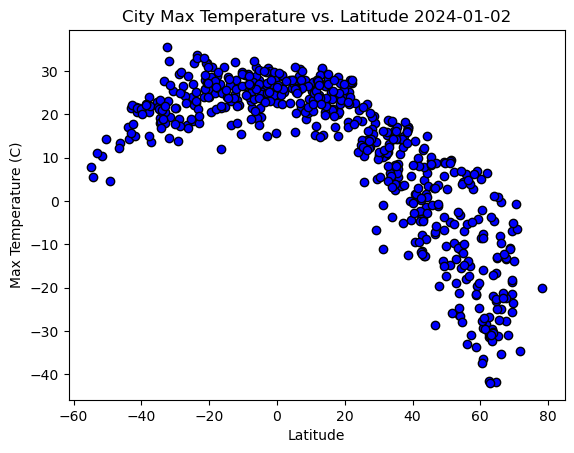

In [9]:
# Build scatter plot for latitude vs. temperature
# 
# Set the axis values
x_axis = city_data_df["Lat"]

y_axis = city_data_df["Max Temp"]
# print(y_axis)

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Max Temperature vs. Latitude 2024-01-02")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

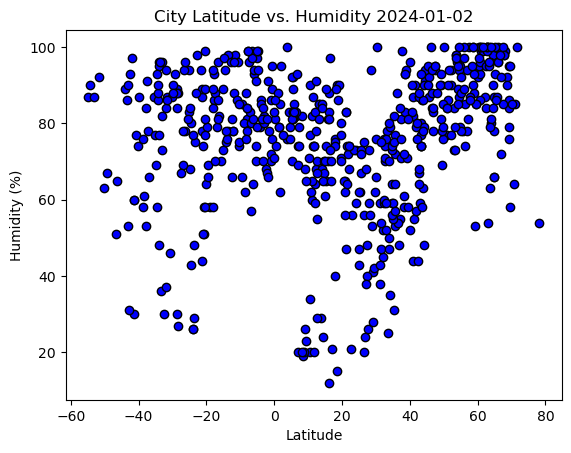

In [10]:
# Build the scatter plots for latitude vs. humidity
# Set the axis values
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity 2024-01-02")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

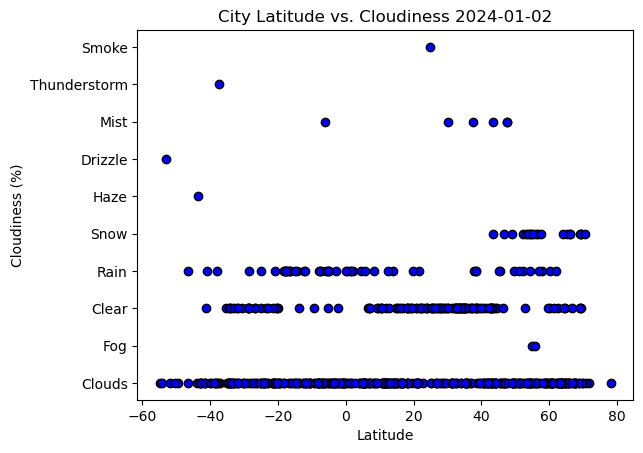

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

# Incorporate the other graph properties
# plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
#             s=x_axis, alpha=0.75)
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness 2024-01-02")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

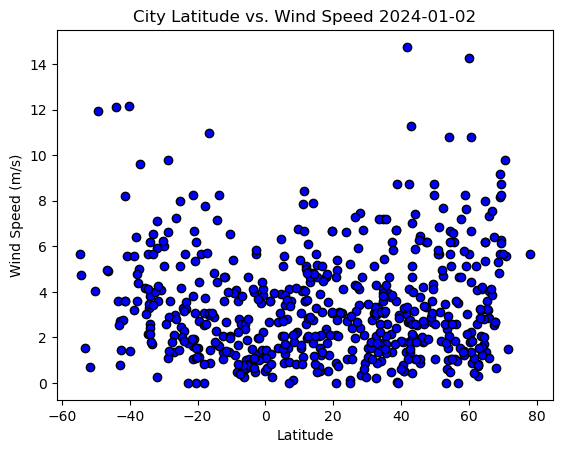

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed 2024-01-02")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def mathy_stuff():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Barcelos,41.5388,-8.6151,9.91,90,Clouds,3.03,PT,1704415837
2,Stanley,54.8680,-1.6985,4.32,95,Fog,1.03,GB,1704415838
3,Anadyr,64.7500,177.4833,-16.72,78,Clear,8.00,RU,1704415838
4,Longyearbyen,78.2186,15.6401,-20.09,54,Clouds,5.66,SJ,1704415838
5,Holualoa,19.6228,-155.9522,24.91,71,Clear,3.09,US,1704415838


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Waitangi,-43.9535,-176.5597,17.12,89,Clouds,12.11,NZ,1704415838
7,Pimenta Bueno,-11.6725,-61.1936,23.36,98,Clouds,2.66,BR,1704415838
9,Blackmans Bay,-43.0167,147.3167,21.40,53,Clouds,2.71,AU,1704415838
10,Puerto Ayora,-0.7393,-90.3518,25.31,95,Clouds,2.24,EC,1704415838
11,Ushuaia,-54.8000,-68.3000,7.81,87,Clouds,5.66,AR,1704415838


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7604463859191642


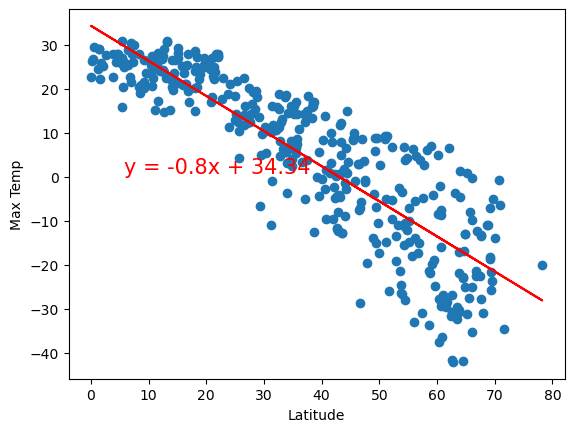

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call function
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
mathy_stuff()


The r-squared is: 0.2789382963039642


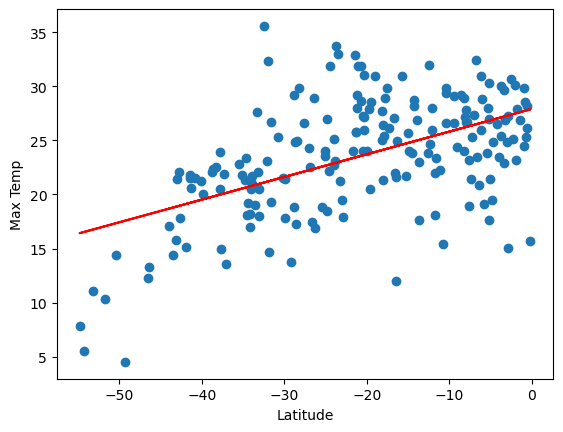

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
# Call function
mathy_stuff()

**Discussion about the linear relationship:
There is a strong correlation between the max temperature and the Latitude of the city, and the lower the latitude in the Northern hemisphere, the higher the max temperature.  In the Southern hemisphere, the correlation is not as strong, but the higher the latitude, the higher the max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.171415991879126


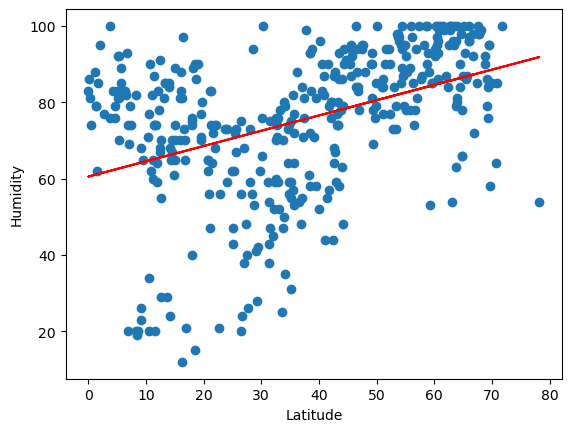

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call function
plt.xlabel("Latitude")
plt.ylabel("Humidity")
mathy_stuff()

The r-squared is: 0.03889116510252338


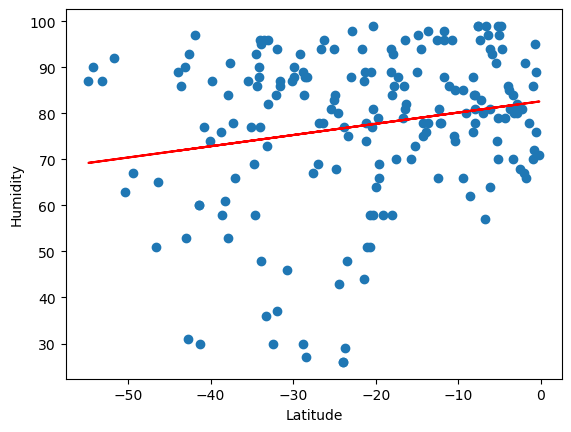

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Call function
mathy_stuff()

**Discussion about the linear relationship:  The correlation between humidity and latitude is less clear.  There are a lot more outliers in both the Northern and Southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.171415991879126


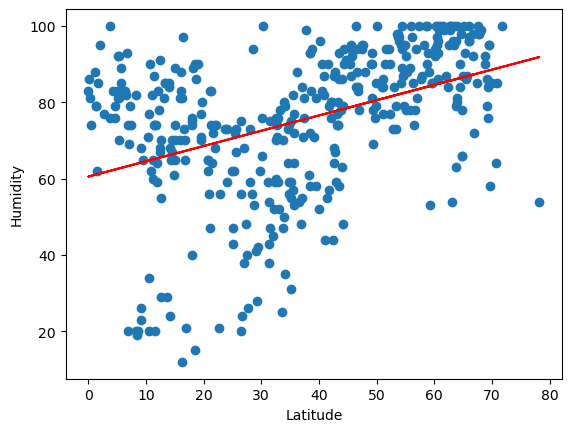

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call function
plt.xlabel("Latitude")
plt.ylabel("Humidity")
mathy_stuff()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

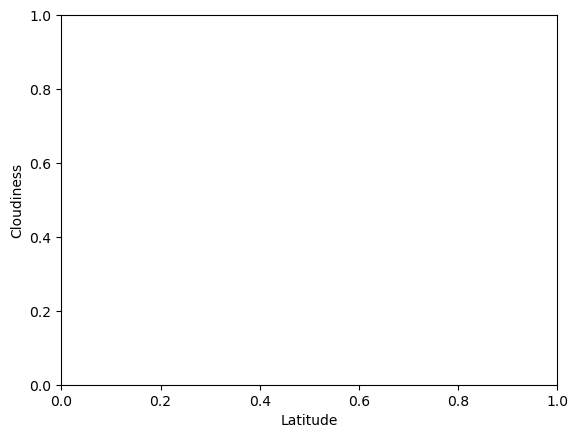

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Call function
mathy_stuff()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03059213411496265


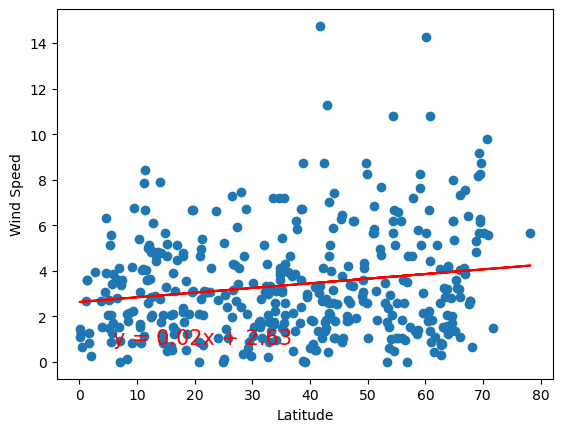

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call function
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
mathy_stuff()

The r-squared is: 0.12436749130958032


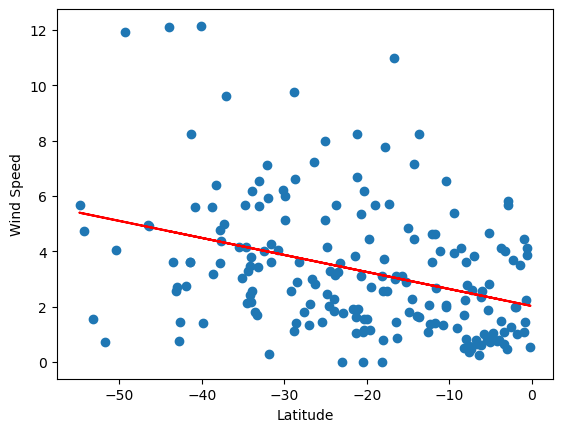

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Call function
mathy_stuff()

**Discussion about the linear relationship:There does not appear to be a correlation of Wind Speed for either the Northern or Southern hemispheres.